### Regression Part II

**OBJECTIVES**

- Use `sklearn` to build multiple regression models
- Use `statsmodels` to build multiple regression models
- Evaluate models using `mean_squared_error`
- Interpret categorical coefficients

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Using Many Features

The big idea with a regression model is its ability to learn parameters of linear equations.  

$$y = \beta_0 + \beta_1x \quad and \quad y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3 + \dots$$

$$\begin{bmatrix} 1 & 3.2 & 4 \\
                        1 & 5.2 & 3 \\
                        1 & 4.1 & 3.4 
                        \end{bmatrix} \begin{bmatrix} \beta_0 \\
                        \beta_1 \\
                        \beta_2 \end{bmatrix} = \begin{bmatrix} 12 \\
                        10.4 \\
                        9.7 \end{bmatrix}$$
                        
$$X\beta =y$$

$$\beta = (X^TX)^{-1}X^Ty$$

In [2]:
tips = sns.load_dataset('tips')

In [3]:
X = tips['total_bill'].values.reshape(-1, 1)
y = tips['tip'].values.reshape(-1, 1)

In [4]:
#column of ones for intercept
intercept = np.ones(shape = X.shape)
#design matrix contains leading column of ones
design_matrix = np.concatenate((intercept, X), axis = 1)

In [5]:
design_matrix[:5]

array([[ 1.  , 16.99],
       [ 1.  , 10.34],
       [ 1.  , 21.01],
       [ 1.  , 23.68],
       [ 1.  , 24.59]])

In [6]:
#linear algebra solution to least squares
np.linalg.inv(design_matrix.T@design_matrix)@design_matrix.T@y

array([[0.92026961],
       [0.10502452]])

### Advertising Data

The goal here is to predict sales. We have spending on three different media types to help make such predictions.  Here, we want to be selective about what features are used as inputs to the model.


In [7]:
ads = pd.read_csv('https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_fa25/main/data/ads.csv', index_col=0)

In [8]:
ads.head()

TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

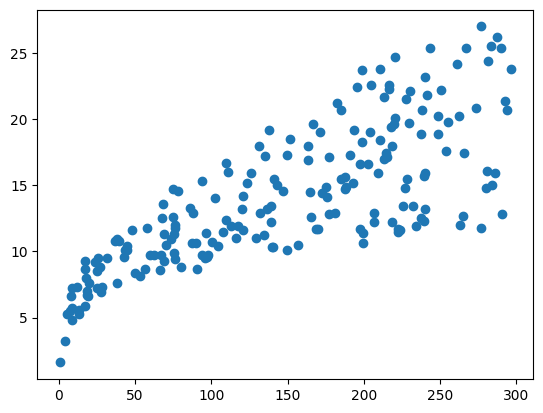

In [9]:
#scatterplot
plt.scatter(ads['TV'], ads['sales']);

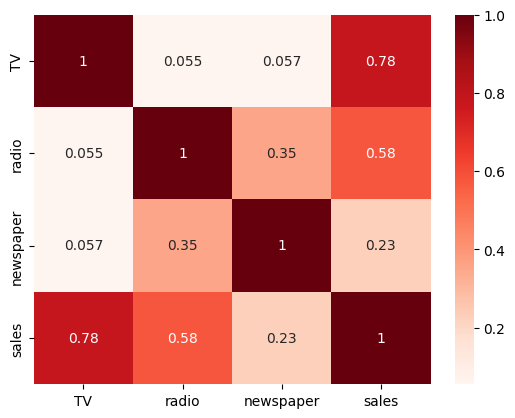

In [10]:
# heatmap
sns.heatmap(ads.corr(), annot = True, cmap = 'Reds');

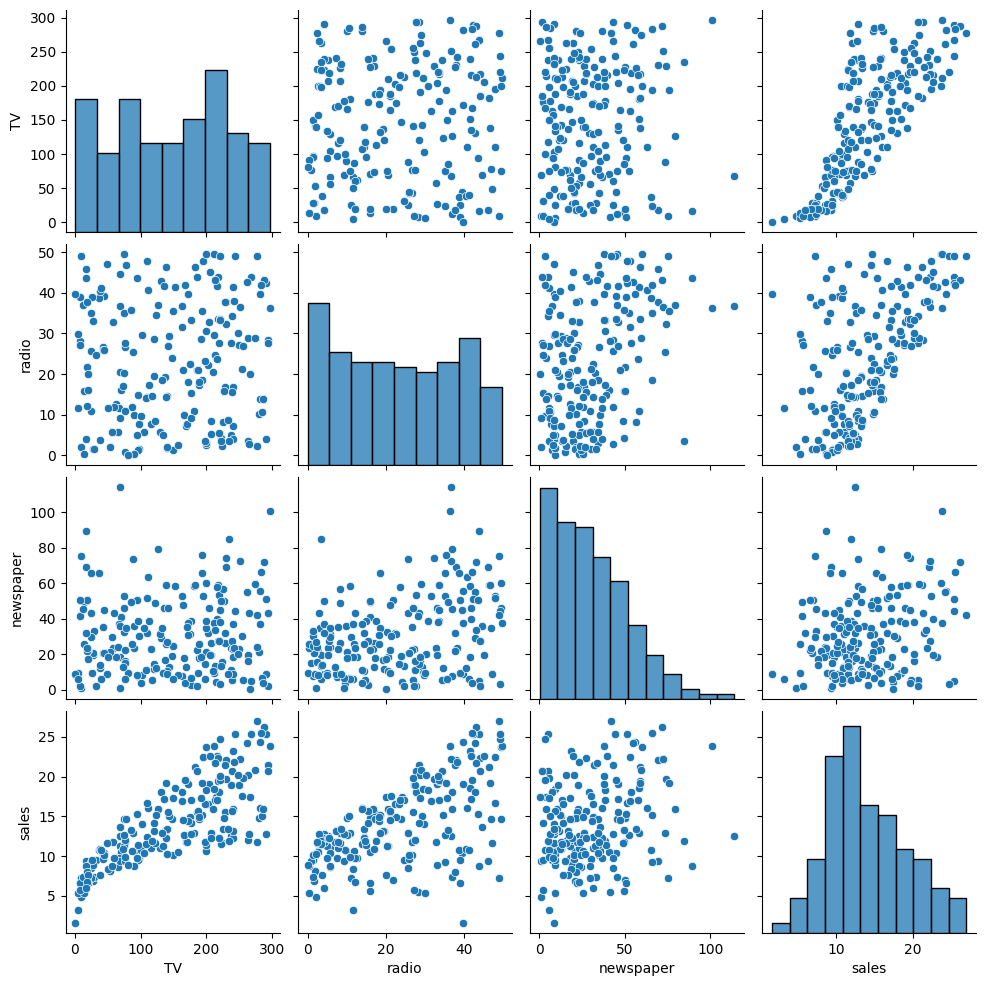

In [11]:
# pairplot
sns.pairplot(ads);

1. Choose a single column as `X` to predict sales.  Justify your choice -- remember to make `X` 2D.

In [12]:
#declare X and y
X = ''
y = ''

2. Build a regression model to predict `sales` using your `X` above.

In [13]:
# instantiate and fit the model
model1 = ''

3. Interpret the slope of the model.

In [14]:
# examine slope, what does it mean?


4. Interpret the intercept of the model.

In [15]:
#intercept


5. Determine the `mean_squared_error` of the model.

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
# MSE


6. Create baseline predictions using the mean of `y`. (Try the `DummyRegressor` [here](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html#sklearn.dummy.DummyRegressor)).

In [36]:
from sklearn.dummy import DummyRegressor

7. Compute the `mean_squared_error` of your baseline predictions.

In [18]:
# MSE Baseline


8. Did your model perform better than the baseline?  

9. What does the `PredictionErrorDisplay` object do?  Can you demonstrate its use?

In [37]:
from sklearn.metrics import PredictionErrorDisplay

#### the `.score` method

In addition to the `mean_squared_error` function, you are able to evaluate regression models using the objects `.score` method.  This method evaluates in terms of $r^2$.  One way to understand this metric is as the ratio between the *residual sum of squares* and the *total sum of squares*.  These are given by:

$$RSS =  \sum _{i}(y_{i}-f_{i})^{2}$$

$$TSS = \sum _{i}(y_{i}-{\bar {y}})^{2}$$

and 

$$r^2 = 1 - \frac{RSS}{TSS}$$

In [19]:
#model score


You can interpret this as the percent of variation in the data explained by the features according to your model.

#### Adding Features

Now, we want to include a second feature as input to the model.  Reexamine the plots and correlations above, what is a good second choice?

9. Choose two columns from the `ads` data, assign these as `X`. 

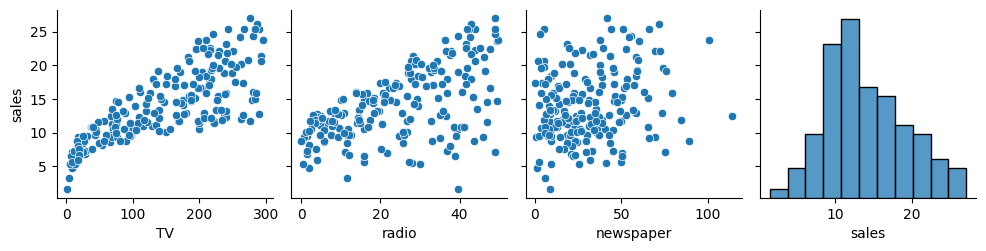

In [20]:
sns.pairplot(ads, y_vars = 'sales')

In [21]:
# X2
X2 = ads[['']]

10. Build a regression model with two features to predict `sales`.

In [22]:
# lr2 model


11. Evaluate the model using `mean_squared_error`.

In [23]:
# yhat2

# MSE


12. Interpret the coefficients of the model

In [24]:
# make a dataframe here


### Example II: California Housing Data



In [43]:
cali = pd.read_csv('https://raw.githubusercontent.com/ageron/data/refs/heads/main/housing/housing.csv')
cali.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [58]:
# !pip install folium

In [44]:
import folium

In [45]:
from folium.plugins import HeatMap

In [56]:
m = folium.Map(cali[['latitude', 'longitude']].values[0])
HeatMap(cali[['latitude', 'longitude', 'median_house_value']].values, blur = 1, radius = 5).add_to(m);

In [55]:
m

In [59]:
#what features do you think matter?


In [60]:
#any new features we can manufacture?


In [61]:
#any features to encode?


In [62]:
#any missing data?
